In [1]:
from transformers import FlavaProcessor, FlavaModel
from PIL import Image
import torch

# now t-SNE
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# Load FLAVA model and processor
processor = FlavaProcessor.from_pretrained("facebook/flava-full")
model = FlavaModel.from_pretrained("facebook/flava-full")

c:\Users\adits\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


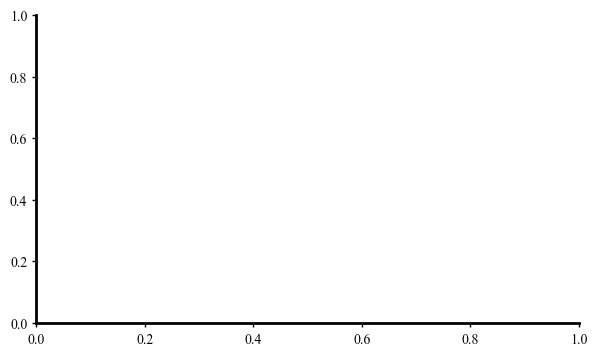

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# set global settings
def init_plotting():
    plt.rcParams['figure.figsize'] = (7., 4.)
    plt.rcParams['font.size'] = 12
    # plt.rcParams['font.family'] = 'T'
    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams['axes.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['axes.titlesize'] = 1.5*plt.rcParams['font.size']
    plt.rcParams['legend.fontsize'] = plt.rcParams['font.size']
    plt.rcParams['xtick.labelsize'] = 10
    plt.rcParams['ytick.labelsize'] = 10
    # plt.rcParams['savefig.dpi'] = 2*plt.rcParams['savefig.dpi']
    plt.rcParams['xtick.major.size'] = 3
    plt.rcParams['xtick.minor.size'] = 3
    plt.rcParams['xtick.major.width'] = 1
    plt.rcParams['xtick.minor.width'] = 1
    plt.rcParams['ytick.major.size'] = 3
    plt.rcParams['ytick.minor.size'] = 3
    plt.rcParams['ytick.major.width'] = 1
    plt.rcParams['ytick.minor.width'] = 1
    # plt.rcParams['legend.frameon'] = False
    plt.rcParams['legend.loc'] = 'best'
    plt.rcParams['axes.linewidth'] = 2.

    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    plt.gca().xaxis.set_ticks_position('bottom')
    plt.gca().yaxis.set_ticks_position('left')

init_plotting()

In [3]:
# sports vs arts
lis_1 = ["basketball", "football", "soccer", "tennis", "gym", "jogging", "running", "swimming", "cycling", "yoga"]
lis_2 = ["museum", "art", "gallery", "exhibition", "theater", "concert", "opera", "ballet", "cinema", "movie"]

# introvert vs extrovert
lis_3 = ["video games", "reading", "writing", "cooking", "puzzle solver"]
lis_4 = ["partying", "socializing", "meeting", "networking", "clubbing"]

# male vs female
lis_5 = ["man", "king", "uncle", "brother", "son", "father", "husband", "boyfriend"]
lis_6 = ["woman", "queen", "aunt", "sister", "daughter", "mother", "wife", "girlfriend"]

# luxury vs simplicity
lis_7 = ["high quality", "exclusive", "luxurious", "private yacht", "golf"]
lis_8 = ["minimalism", "community", "simple", "public bus", "backpacking"]

In [4]:
# let's cluster the words after applying t-SNE
# plt.rcParams['figure.figsize'] = [8, 6]
def cluster(lis_1, lis_2, label_1, label_2, name):
    embeddings = []
    labels = lis_1 + lis_2
    for word in labels:
        inputs = processor(text=word, return_tensors="pt")
        with torch.no_grad():
            outputs = model(**inputs)
            text_embeddings = outputs.text_embeddings
            cls_token_multimodal = text_embeddings[:, 0, :].squeeze()
            embeddings.append(cls_token_multimodal)
    
    X = np.array([embedding.numpy() for embedding in embeddings])
    X_embedded = TSNE(n_components=2, perplexity=3).fit_transform(X)
    
    # plt.figure(figsize=(6, 6))
    plt.scatter(X_embedded[:len(lis_1), 0], X_embedded[:len(lis_1), 1], color='red', label = label_1)
    plt.scatter(X_embedded[len(lis_1):, 0], X_embedded[len(lis_1):, 1], color='blue', label = label_2)
    
    for i, label in enumerate(labels):
        plt.annotate(label, (X_embedded[i, 0], X_embedded[i, 1]), fontsize=12)
    
    plt.legend()
    
    # save plot as pdf
    # plt.title("t-SNE plot of terms pertaining to luxury vs simplicity")
    # plt.savefig(name + ".pdf", bbox_inches='tight')
    plt.show()
    

c:\Users\adits\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\modeling_utils.py:1160: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


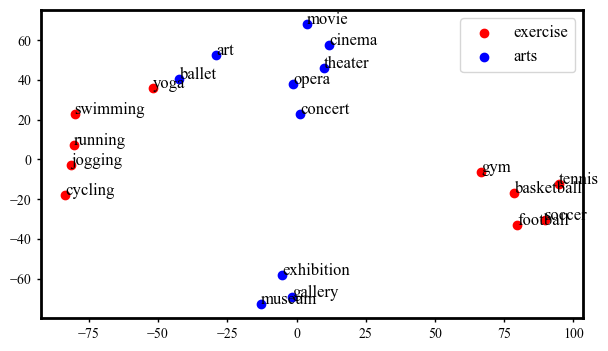

c:\Users\adits\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\modeling_utils.py:1160: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


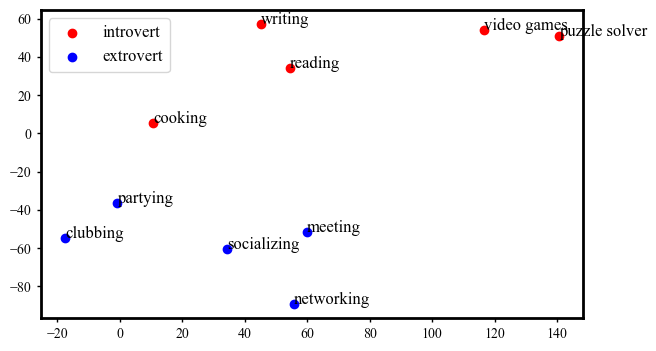

c:\Users\adits\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\modeling_utils.py:1160: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


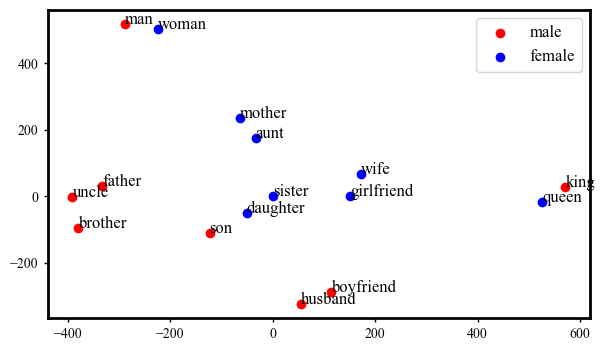

c:\Users\adits\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\modeling_utils.py:1160: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


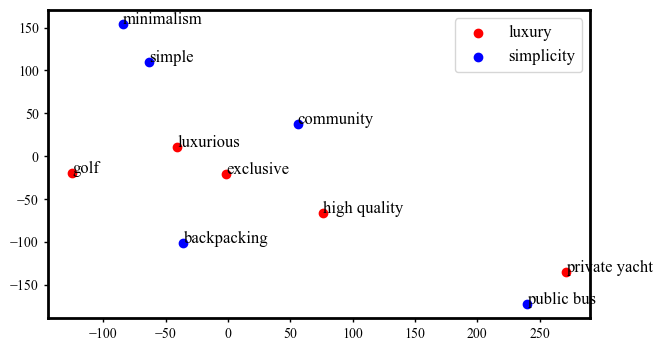

In [5]:
lis = [lis_1, lis_2, lis_3, lis_4, lis_5, lis_6, lis_7, lis_8]
labels = ["exercise", "arts", "introvert", "extrovert", "male", "female", "luxury", "simplicity"]
names = ["exercise_arts", "introvert_extrovert", "male_female", "luxury_simplicity"]


for i in range(0, len(lis), 2):
    cluster(lis[i], lis[i+1], labels[i], labels[i+1], names[i//2])